In [ ]:
pip install numpy matplotlib

<ipython-input-2-d76909c6bc3a>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  likelihood_vals[j, i] = likelihood([w0[i], w1[j]], X_train, y_train)


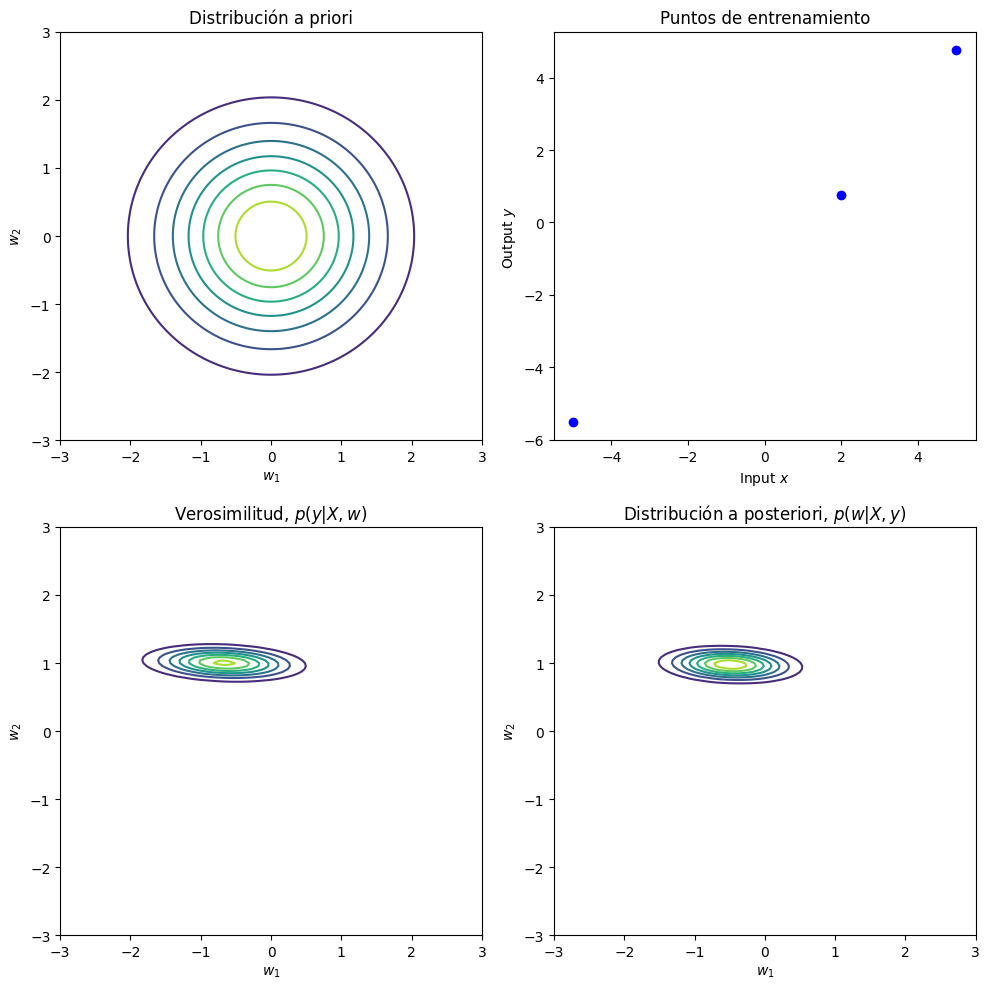

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Configuración inicial
np.random.seed(42)

sigma_n = 1.0  # Desviación estándar del ruido

# Puntos de entrenamiento (-5, -5.5), (2, 0.75) y (5, 4.75)
X_train = np.array([-5, 2, 5])
y_train = np.array([-5.5, 0.75, 4.75])

# Espacio de parámetros
w0 = np.linspace(-2.1, 2.1, 100)
w1 = np.linspace(-2.1, 2.1, 100)
W0, W1 = np.meshgrid(w0, w1)
pos = np.empty(W0.shape + (2,))
pos[:, :, 0] = W0
pos[:, :, 1] = W1

# Función para calcular la verosimilitud
# Notas: w[0] + w[1] * X[:, None]) calcula la prediccion del modelo
#        y[:, None] transforma y en un vector columna
def likelihood(w, X, y):
    return np.exp(-0.5 * np.sum((y[:, None] - (w[0] + w[1] * X[:, None]))**2, axis=0))

# 1. Contorno de la distribución a priori: normal 0,1
prior = multivariate_normal(mean=[0, 0], cov=np.eye(2))

# 2. Puntos de entrenamiento
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Contorno de la distribución a priori
axs[0, 0].contour(W0, W1, prior.pdf(pos))
axs[0, 0].set_title('Distribución a priori')
axs[0, 0].set_xlabel('$w_1$')
axs[0, 0].set_ylabel('$w_2$')
axs[0, 0].set_xlim([-3, 3])
axs[0, 0].set_ylim([-3, 3])

# Puntos de entrenamiento
axs[0, 1].scatter(X_train, y_train, color='blue')
axs[0, 1].set_title('Puntos de entrenamiento')
axs[0, 1].set_xlabel('Input $x$')
axs[0, 1].set_ylabel('Output $y$')

# 3. Contorno de la verosimilitud
likelihood_vals = np.zeros_like(W0)
for i in range(len(w0)):
    for j in range(len(w1)):
        likelihood_vals[j, i] = likelihood([w0[i], w1[j]], X_train, y_train)
likelihood_vals /= np.sum(likelihood_vals)  # Normalizar

axs[1, 0].contour(W0, W1, likelihood_vals)
axs[1, 0].set_title('Verosimilitud, $p(y|X, w)$')
axs[1, 0].set_xlabel('$w_1$')
axs[1, 0].set_ylabel('$w_2$')
axs[1, 0].set_xlim([-3, 3])
axs[1, 0].set_ylim([-3, 3])

# 4. Contorno de la distribución a posteriori
# Matriz de covarianza a posteriori
# X es la matriz de diseño o matriz de características extendida,
# donde la primera columna es un vector de unos (para el término de bias/intersección) y la segunda columna son los valores de X_train
X = np.vstack((np.ones(len(X_train)), X_train)).T
A = np.linalg.inv(1 / sigma_n**2 * X.T @ X + np.eye(2))

# Media a posteriori
mN = 1 / sigma_n**2 * A @ X.T @ y_train

posterior = multivariate_normal(mean=mN, cov=A)

axs[1, 1].contour(W0, W1, posterior.pdf(pos))
axs[1, 1].set_title('Distribución a posteriori, $p(w|X, y)$')
axs[1, 1].set_xlabel('$w_1$')
axs[1, 1].set_ylabel('$w_2$')
axs[1, 1].set_xlim([-3, 3])
axs[1, 1].set_ylim([-3, 3])

plt.tight_layout()
plt.show()

Añado versión con leyenda:

<ipython-input-21-27bcea40c2be>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  likelihood_vals[j, i] = likelihood([w0[i], w1[j]], X_train, y_train)
<ipython-input-21-27bcea40c2be>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


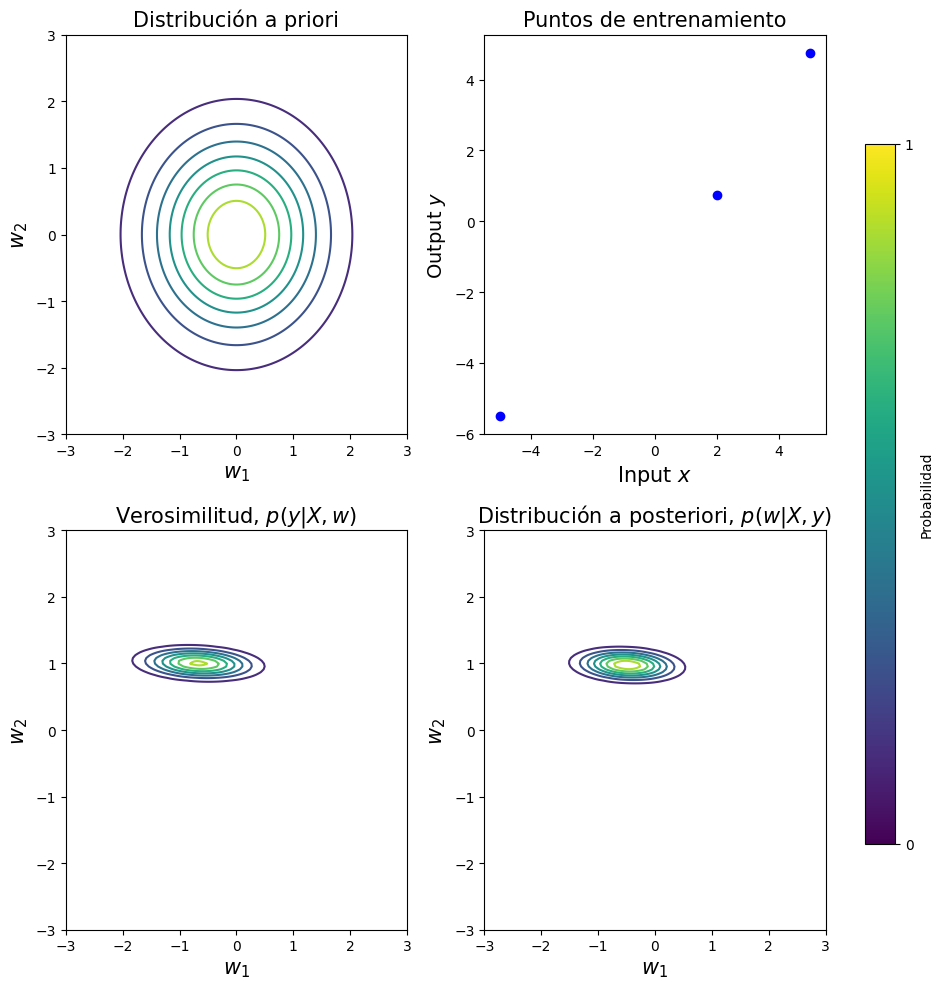

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Configuración inicial
np.random.seed(42)

sigma_n = 1.0  # Desviación estándar del ruido

# Puntos de entrenamiento (-5, -5.5), (2, 0.75) y (5, 4.75)
X_train = np.array([-5, 2, 5])
y_train = np.array([-5.5, 0.75, 4.75])

# Espacio de parámetros
w0 = np.linspace(-2.1, 2.1, 100)
w1 = np.linspace(-2.1, 2.1, 100)
W0, W1 = np.meshgrid(w0, w1)
pos = np.empty(W0.shape + (2,))
pos[:, :, 0] = W0
pos[:, :, 1] = W1

# Función para calcular la verosimilitud
def likelihood(w, X, y):
    return np.exp(-0.5 * np.sum((y[:, None] - (w[0] + w[1] * X[:, None]))**2, axis=0))

# 1. Contorno de la distribución a priori: normal 0,1
prior = multivariate_normal(mean=[0, 0], cov=np.eye(2))

# 2. Puntos de entrenamiento
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Contorno de la distribución a priori
CS_prior = axs[0, 0].contour(W0, W1, prior.pdf(pos), cmap='viridis')
axs[0, 0].set_title('Distribución a priori', fontsize=15)
axs[0, 0].set_xlabel('$w_1$', fontsize=15)
axs[0, 0].set_ylabel('$w_2$', fontsize=15)
axs[0, 0].set_xlim([-3, 3])
axs[0, 0].set_ylim([-3, 3])

# Puntos de entrenamiento
axs[0, 1].scatter(X_train, y_train, color='blue')
axs[0, 1].set_title('Puntos de entrenamiento', fontsize=15)
axs[0, 1].set_xlabel('Input $x$', fontsize=15)
axs[0, 1].set_ylabel('Output $y$', fontsize=14)

# 3. Contorno de la verosimilitud
likelihood_vals = np.zeros_like(W0)
for i in range(len(w0)):
    for j in range(len(w1)):
        likelihood_vals[j, i] = likelihood([w0[i], w1[j]], X_train, y_train)
likelihood_vals /= np.sum(likelihood_vals)  # Normalizar

CS_likelihood = axs[1, 0].contour(W0, W1, likelihood_vals, cmap='viridis')
axs[1, 0].set_title('Verosimilitud, $p(y|X, w)$', fontsize=15)
axs[1, 0].set_xlabel('$w_1$', fontsize=15)
axs[1, 0].set_ylabel('$w_2$', fontsize=15)
axs[1, 0].set_xlim([-3, 3])
axs[1, 0].set_ylim([-3, 3])

# 4. Contorno de la distribución a posteriori
X = np.vstack((np.ones(len(X_train)), X_train)).T
A = np.linalg.inv(1 / sigma_n**2 * X.T @ X + np.eye(2))
mN = 1 / sigma_n**2 * A @ X.T @ y_train

posterior = multivariate_normal(mean=mN, cov=A)

CS_posterior = axs[1, 1].contour(W0, W1, posterior.pdf(pos), cmap='viridis')
axs[1, 1].set_title('Distribución a posteriori, $p(w|X, y)$', fontsize=15)
axs[1, 1].set_xlabel('$w_1$', fontsize=15)
axs[1, 1].set_ylabel('$w_2$', fontsize=15)
axs[1, 1].set_xlim([-3, 3])
axs[1, 1].set_ylim([-3, 3])


# Añadir una única barra de color a la derecha sin interferir
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
norm = plt.Normalize(vmin=0, vmax=1)  # Normalizar la escala de color de 0 a 1
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, ticks=[0, 1], label='Probabilidad')




plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


[-0.48842593  0.97685185]


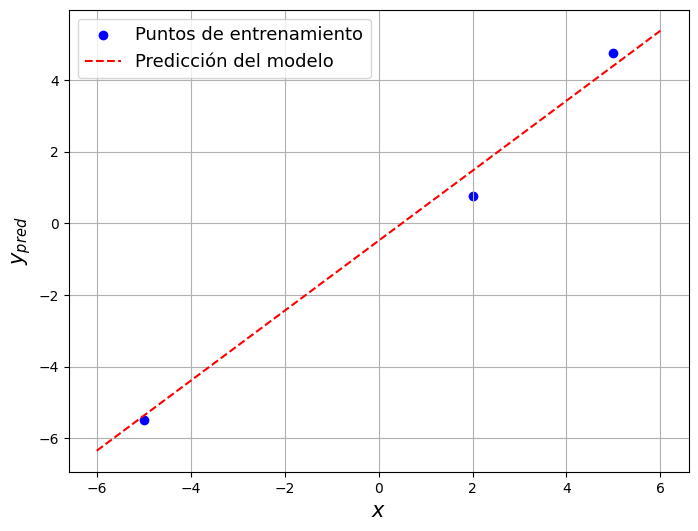

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42)

# Puntos de entrenamiento
X_train = np.array([-5, 2, 5])
y_train = np.array([-5.5, 0.75, 4.75])




# Generar predicciones
X_pred = np.linspace(-6, 6, 100)
y_pred = mN[0] + mN[1] * X_pred

print(mN)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Puntos de entrenamiento')
plt.plot(X_pred, y_pred, 'r--', label='Predicción del modelo')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y_{pred}$', fontsize=15)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()